# 2주차 Session 3: 데이터 시각화 (Visualization)

**Matplotlib**과 **Seaborn**을 사용하여 데이터를 그래프로 시각화합니다.
타이타닉 데이터를 활용하여 다양한 변수 간의 관계를 탐색해 봅니다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드 (Seaborn 내장 타이타닉 데이터)
df = sns.load_dataset('titanic')

# 데이터 확인
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 1. 다양한 그래프 그리기
*   **산점도 (Scatter Plot)**: 나이와 요금의 상관관계
*   **히스토그램 (Histogram)**: 나이 분포
*   **막대 그래프 (Bar Plot)**: 등급별 생존율
*   **박스 플롯 (Box Plot)**: 등급별 요금 분포 확인

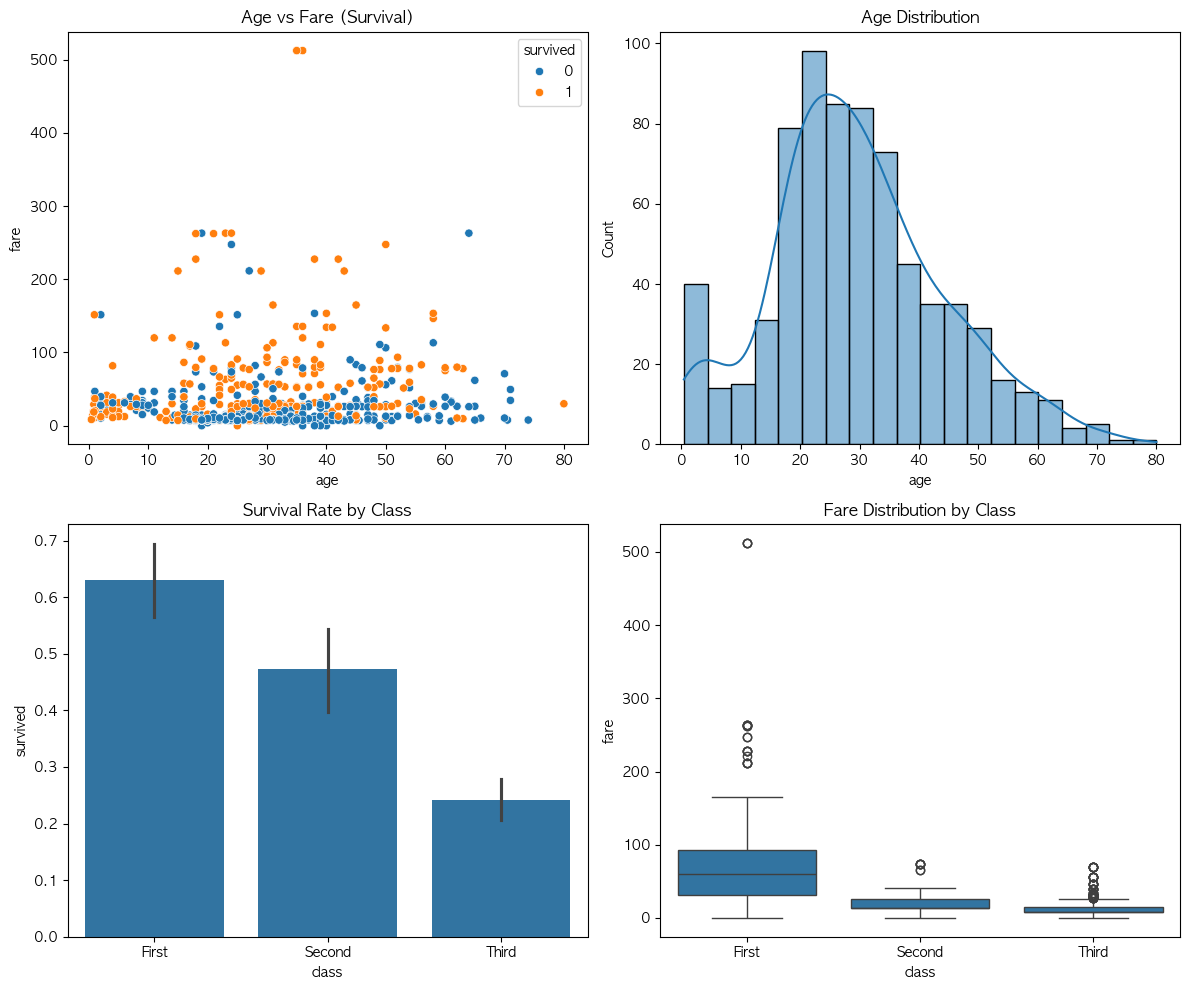

In [2]:
# 한글 폰트 설정 (Mac: AppleGothic, Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'AppleGothic' 

plt.figure(figsize=(12, 10))

# 1) 산점도: Age vs Fare
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare (Survival)')

# 2) 히스토그램: Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')

# 3) 막대 그래프: Survival Rate by Class
plt.subplot(2, 2, 3)
sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')

# 4) 박스 플롯: Fare Distribution by Class
plt.subplot(2, 2, 4)
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution by Class')

plt.tight_layout()
plt.show()

### Practice Challenge
1.  **박스 플롯 해석**: 'First' Class(1등석)의 요금 분포에 이상치(점)가 많나요? 이것은 무엇을 의미할까요?
2.  **그래프 변경**: `scatterplot` 대신 `regplot`을 사용하면 추세선을 볼 수 있습니다.
3.  **가족 관계 시각화**: `sibsp`(형제자매수)와 `parch`(부모자녀수)를 합쳐 `family_size`를 만들고, 생존율과의 관계를 그래프로 그려보세요.

In [3]:
# 답: 네, 1등석(First Class)의 요금 분포에는 상단에 많은 이상치(점)가 발견됩니다. 
# 이는 1등석 내에서도 일반적인 요금 범위를 훨씬 초과하는 매우 비싼 요금을 지불한 승객들(예: 초호화 스위트룸 이용자)이 있었음을 의미합니다.

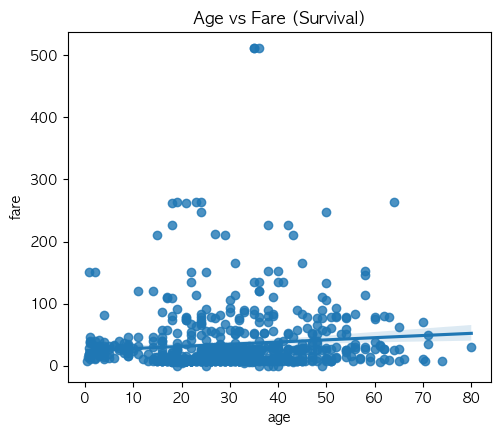

In [5]:
plt.figure(figsize=(12, 10))

# regplot : 산점도 + 추세선
plt.subplot(2, 2, 1)
sns.regplot(x='age', y='fare', data=df)
plt.title('Age vs Fare (Survival)')
plt.show()


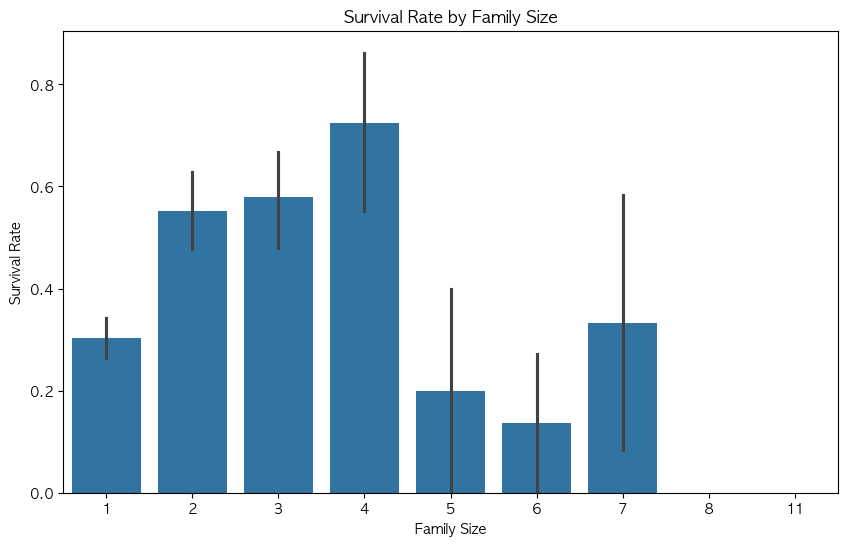

In [6]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


## 4. 인사이트 도출 (Insights)

### 🌟 Key Takeaways
*   **백문이 불여일견**: 수치로만 보는 것보다 그래프(Histogram, Scatter Plot)를 그렸을 때 데이터의 패턴과 상관관계를 훨씬 직관적으로 파악할 수 있었습니다.
*   **Seaborn의 편리함**: Matplotlib보다 더 적은 코드로 더 예쁜 통계 그래프를 그릴 수 있음을 확인했습니다.

### 🔬 Try More
*   **상관관계 히트맵**: `sns.heatmap(df.corr())`을 이용해 변수들 간의 상관관계를 한눈에 시각화해보세요.
